In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [15]:
df_bangl = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/Bengaluru Branch.csv')
df_chennai = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/Chennai Branch.csv')
df_Hyd = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/Hyderabad Branch.csv')
df_Kolk = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/Kolkata Branch.csv')
df_Mum = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/Mumbai Branch.csv')
df_NewD = pd.read_csv('/Users/mit/Desktop/DE/Final_Projects_ADE/2.Datasets_Sales_Data_Visualization_Using_Azure_Synapse_Analytics/New Delhi Branch.csv')

In [16]:
df_total = pd.concat([df_bangl,df_chennai,df_Hyd,df_Kolk,df_Mum,df_NewD]).reset_index(drop=True)

In [17]:
df_total= df_total.drop_duplicates().dropna()

In [18]:
df_total['avg sales'] = df_total['Revenue']/df_total['Sales_Count']

In [19]:
display(df_total)

,Location,Brand_Name,Sales_Count,Revenue,avg sales
0,Bengaluru,Peter England,320,200000,625.000000
1,Bengaluru,Fab India,100,80000,800.000000
2,Bengaluru,Raymond,120,400000,3333.333333
3,Bengaluru,Allen Solly,110,330000,3000.000000
4,Bengaluru,Mufti,100,100000,1000.000000
5,Bengaluru,Globus,175,325000,1857.142857
6,Chennai,Peter England,300,220000,733.333333
7,Chennai,Fab India,100,50000,500.000000
8,Chennai,Raymond,200,400000,2000.000000
9,Chennai,Allen Solly,170,330000,1941.176471


In [29]:
df_pvttbl=df_total.groupby("Location").agg({"avg sales":"sum","Sales_Count":"sum","Revenue":"sum"})
df_pvttbl.reset_index(inplace=True)

In [30]:
display(df_pvttbl)

,Location,avg sales,Sales_Count,Revenue
0,Bengaluru,10615.476190,925,1435000
1,Chennai,7396.732026,1040,1290000
2,Delhi,8500.000000,830,1110000
3,Hyderabad,8041.666667,1130,1505000
4,Kolkata,8115.000000,1170,1725000
5,Mumbai,8622.222222,1000,1480000


In [31]:
df_pvttbl.dtypes

Location        object
avg sales      float64
Sales_Count      int64
Revenue          int64
dtype: object

In [32]:
df_pvttbl['avg sales']=df_pvttbl['avg sales'].astype(int)

In [33]:
display(df_pvttbl)

,Location,avg sales,Sales_Count,Revenue
0,Bengaluru,10615,925,1435000
1,Chennai,7396,1040,1290000
2,Delhi,8500,830,1110000
3,Hyderabad,8041,1130,1505000
4,Kolkata,8115,1170,1725000
5,Mumbai,8622,1000,1480000


In [34]:
df_brand = df_total.groupby('Brand_Name').agg({"Sales_Count":"sum","Revenue":"sum"})
df_brand.reset_index(inplace=True)

In [35]:
display(df_brand)

,Brand_Name,Sales_Count,Revenue
0,Allen Solly,990,2700000
1,Fab India,520,290000
2,Globus,1015,1585000
3,Mufti,990,1000000
4,Peter England,1540,950000
5,Raymond,1040,2020000


In [36]:
df_brand.dtypes

Brand_Name     object
Sales_Count     int64
Revenue         int64
dtype: object

Text(0, 0.5, 'Avg sales')

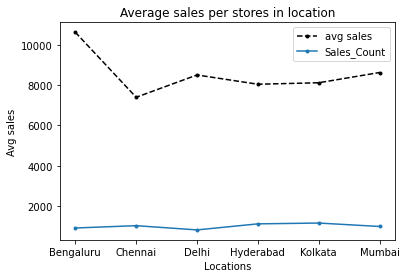

In [55]:
ax = df_pvttbl.plot(x='Location', y = ['avg sales', 'Sales_Count'],marker = '.', title='Average sales per stores in location', style = {'avg sales':'k--'})
ax.set_xlabel('Locations')
ax.set_ylabel('Avg sales')

In [47]:
x = df_brand['Brand_Name']
y = df_brand['Revenue']

Text(0.5, 1.0, 'Revenue Per Brand')

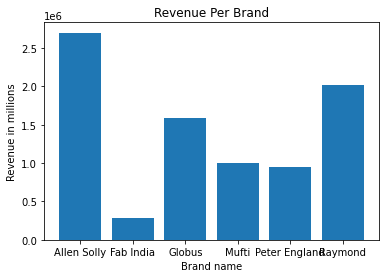

In [58]:
bx = plt.bar(x,y)
plt.xlabel('Brand name')
plt.ylabel('Revenue in millions')
plt.title('Revenue Per Brand')